# Business Case: Aerofit - Descriptive Statistics & Probability (06-Dec-2023)

## About Aerofit

***Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.***

## Business Problem

***The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.***

## Objective

- ***Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.***
- ***For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.***

## Exploratory Data Analysis

In [1]:
import pandas as pd #to read the datasets
import numpy as np # to work with arrays, single or multidimentional array
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import plotly.express as px # for data visualization

### Loading csv file data to Pandas DataFrame

In [2]:
df = pd.read_csv("aerofit_treadmill.csv")

### Sense check of Dataframe

In [3]:
df.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47

### Verifying number of Rows & Columns present in the dataset

In [4]:
print(f"No. of Rows : {df.shape[0]}\nNo. of Columns : {df.shape[1]}")

No. of Rows : 180
No. of Columns : 9


### Verifying Name of Columns

In [5]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### Column wise Info about Data types, Name and Null value status

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Verifying basic Statistical Summary

In [7]:
df.describe(include="all")

Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      KP281         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000000     180.000000  180.000000  
unique         NaN            NaN         NaN  
top            NaN            NaN         NaN  
freq           NaN            NaN         NaN  
mean      3.311111   53719.577778  103.194444  
std       0.958869   16506.684226   51.863605  
min       1.000000   29562.000000   21.000000  
25%       3.000000   44058.750000   66.000000  
50%       3.000000   50596.500000   94.000000  
75%       4.000000   58668.000000  114.750000  
max       5.000000  104581.000000  360.000000

### Checking the Dupliate entries in the entire Dataframe

In [8]:
df.duplicated().sum()

0

#### The above result indicates that there is No duplicate records in this dataset

### Verifying Number of Null values column wise in the entire dataset

In [9]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### The above result indicates that there is No Null values in this dataset

In [10]:
df.describe(include="all")

Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      KP281         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000000     180.000000  180.000000  
unique         NaN            NaN         NaN  
top            NaN            NaN         NaN  
freq           NaN            NaN         NaN  
mean      3.311111   53719.577778  103.194444  
std       0.958869   16506.684226   51.863605  
min       1.000000   29562.000000   21.000000  
25%       3.000000   44058.750000   66.000000  
50%       3.000000   50596.500000   94.000000  
75%       4.000000   58668.000000  114.750000  
max       5.000000  104581.000000  360.000000

***There are no missing values in the data***

***There are 3 unique products in the dataset, KP281 is the most frequently used product***

***Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.***

***Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.***

***Out of 180 data points, 104's gender is Male and rest are the female.***

***Standard deviation for Income & Miles is very high. These variables might have the outliers in it.***

### Verifying the Number of Unique values on each columns & respective values

In [11]:
for i in df.columns:
    print("~"*100)
    print(i,"--> Unique Value Count->[",df[i].nunique(), "] Unique Values are -->", df[i].unique())
print("~"*100)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Product --> Unique Value Count->[ 3 ] Unique Values are --> ['KP281' 'KP481' 'KP781']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Age --> Unique Value Count->[ 32 ] Unique Values are --> [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Gender --> Unique Value Count->[ 2 ] Unique Values are --> ['Male' 'Female']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Education --> Unique Value Count->[ 8 ] Unique Values are --> [14 15 12 13 16 18 20 21]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MaritalStatus --> Unique Value Count->[ 2 ] Unique Values are --> ['Single' 'Partnered']

### Plotting the number of number of unique values

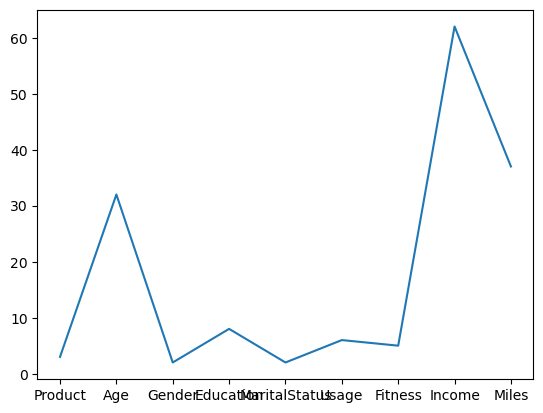

In [12]:
df.nunique().plot()
plt.show()

## Customer Profiling - Categorization of users

### Text Categorizatoin of [Fitness Rating] for further Analysis

In [13]:
df_cat = df
df_cat['Fitness_Category'] = df.Fitness
df_cat["Fitness_Category"].replace({1:"Poor Shape",2:"Bad Shape",3:"Average Shape",
                                    4:"Good Shape",5:"Excellent Shape"},inplace=True)
df_cat.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0   KP281   18    Male         14        Single      3        4   29562   
1   KP281   19    Male         15        Single      2        3   31836   
2   KP281   19  Female         14     Partnered      4        3   30699   
3   KP281   19    Male         12        Single      3        3   32973   
4   KP281   20    Male         13     Partnered      4        2   35247   

   Miles Fitness_Category  
0    112       Good Shape  
1     75    Average Shape  
2     66    Average Shape  
3     85    Average Shape  
4     47        Bad Shape

### Categorization of [Age] for further Analysis

In [14]:
bin_rng = [0,21,35,45,float("inf")]
bin_lbl = ["Teen","Adult","Middle Aged","Elder"]
df_cat['Age_Group'] = pd.cut(df_cat['Age'],bins = bin_rng,labels = bin_lbl)
df_cat.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0   KP281   18    Male         14        Single      3        4   29562   
1   KP281   19    Male         15        Single      2        3   31836   
2   KP281   19  Female         14     Partnered      4        3   30699   
3   KP281   19    Male         12        Single      3        3   32973   
4   KP281   20    Male         13     Partnered      4        2   35247   

   Miles Fitness_Category Age_Group  
0    112       Good Shape      Teen  
1     75    Average Shape      Teen  
2     66    Average Shape      Teen  
3     85    Average Shape      Teen  
4     47        Bad Shape      Teen

### Categorization of [Income] for further Analysis

In [15]:
bin_inc = [0,40000,60000,80000,float("inf")]
inc_lbl = ["Low Income","Moderate Income","High Income","Very High Income"]
df_cat["Income_Group"] = pd.cut(df_cat["Income"],bins = bin_inc,labels = inc_lbl)
df_cat.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0   KP281   18    Male         14        Single      3        4   29562   
1   KP281   19    Male         15        Single      2        3   31836   
2   KP281   19  Female         14     Partnered      4        3   30699   
3   KP281   19    Male         12        Single      3        3   32973   
4   KP281   20    Male         13     Partnered      4        2   35247   

   Miles Fitness_Category Age_Group Income_Group  
0    112       Good Shape      Teen   Low Income  
1     75    Average Shape      Teen   Low Income  
2     66    Average Shape      Teen   Low Income  
3     85    Average Shape      Teen   Low Income  
4     47        Bad Shape      Teen   Low Income

### Categorization of [Miles] for further Analysis

In [16]:
bin_mils = [0,50,100,200,float('inf')]
mils_lbl = ["Light Activity", "Moderate Activity", "Active Lifestyle", "Fitness Enthusiast"]
df_cat["Miles_Group"] = pd.cut(df_cat["Miles"],bins = bin_mils,labels = mils_lbl)
df_cat.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0   KP281   18    Male         14        Single      3        4   29562   
1   KP281   19    Male         15        Single      2        3   31836   
2   KP281   19  Female         14     Partnered      4        3   30699   
3   KP281   19    Male         12        Single      3        3   32973   
4   KP281   20    Male         13     Partnered      4        2   35247   

   Miles Fitness_Category Age_Group Income_Group        Miles_Group  
0    112       Good Shape      Teen   Low Income   Active Lifestyle  
1     75    Average Shape      Teen   Low Income  Moderate Activity  
2     66    Average Shape      Teen   Low Income  Moderate Activity  
3     85    Average Shape      Teen   Low Income  Moderate Activity  
4     47        Bad Shape      Teen   Low Income     Light Activity

## UNIVARIATE ANALYSIS (for multiple variables refer below)

### To begin with we would start by looking at the Distribution of various  Categorical attributes

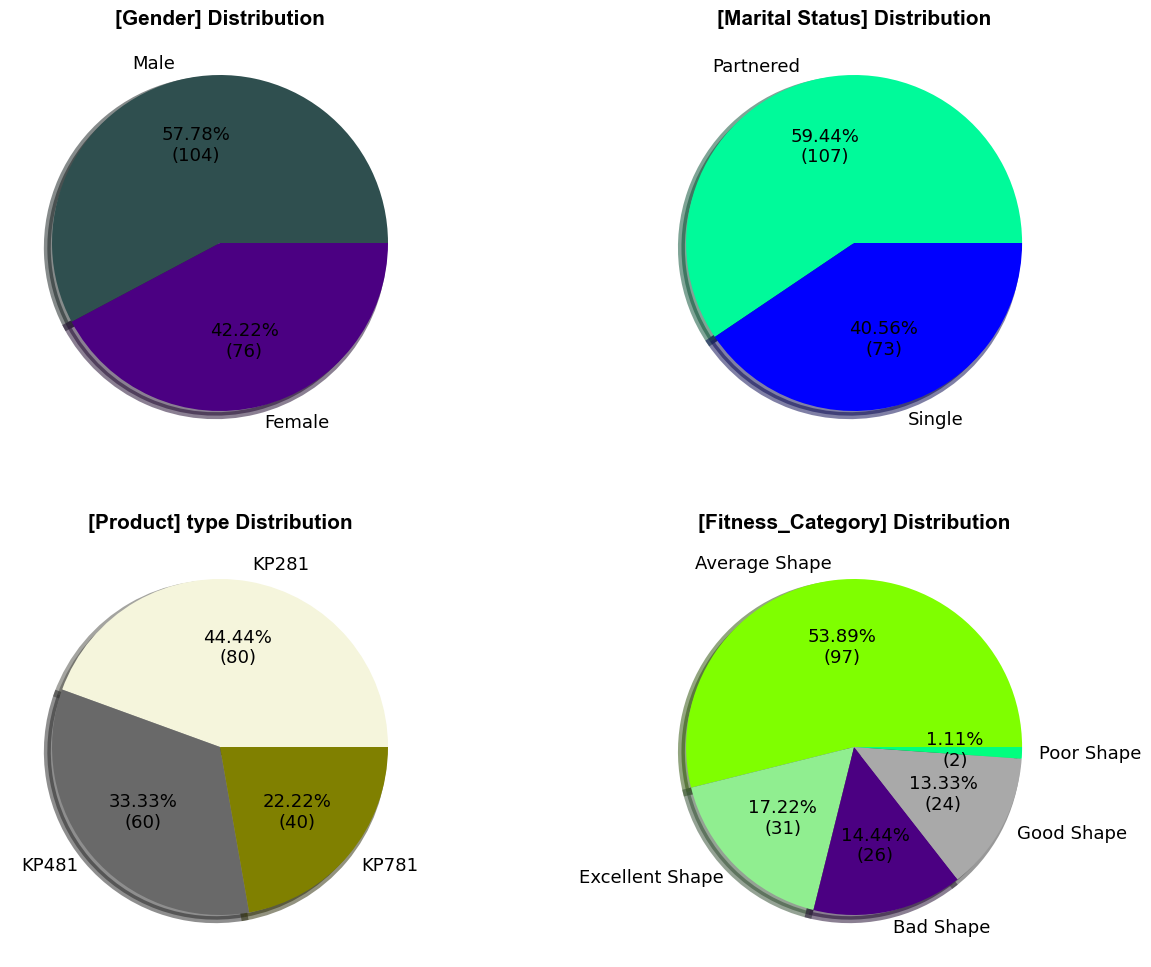

In [17]:
import random, matplotlib.colors as mcolors
#setting the plot style
fig = plt.figure(figsize = (15,12))
gs = fig.add_gridspec(2,2)
#### Creating pie chart for ['Gender'] disribution
ax0 = fig.add_subplot(gs[0,0])
#Function to Get Count of the Attribute & Percentage in PieChart DataLabel
gend = df['Gender'].value_counts().values.sum()
def fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, gend*x/100)
#ax0.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = '%.1f%%',
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 100)
ax0.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = fmt,
        shadow = True,colors=colors,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})
#setting title for visual
ax0.set_title('[Gender] Distribution',{'font':'Arial', 'size':15,'weight':'bold'})
#### Creating pie chart for ['MaritalStatus']
ax1 = fig.add_subplot(gs[0,1])
mstaus = df['MaritalStatus'].value_counts().values.sum()
def fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, mstaus*x/100)
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 100)
ax1.pie(df['MaritalStatus'].value_counts().values,labels = df['MaritalStatus'].value_counts().index,autopct = fmt,
        shadow = True,colors = colors,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})
ax1.set_title('[Marital Status] Distribution',{'font':'Arial', 'size':15,'weight':'bold'})
#### Creating pie chart for ['Product']
prdt = df['Product'].value_counts().values.sum()
def fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, prdt*x/100)
ax2 = fig.add_subplot(gs[1,0])
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 100)
ax2.pie(df_cat['Product'].value_counts().values,labels = df_cat['Product'].value_counts().index,autopct = fmt,
        shadow = True,colors = colors,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})
ax2.set_title('[Product] type Distribution',{'font':'Arial', 'size':15,'weight':'bold'})
#### Creating pie chart for ['Fitness_Category']
fcat = df['Fitness_Category'].value_counts().values.sum()
def fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, fcat*x/100)
ax3 = fig.add_subplot(gs[1,1])
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 100)
ax3.pie(df_cat['Fitness_Category'].value_counts().values,labels = df_cat['Fitness_Category'].value_counts().index,autopct = fmt,
        shadow = True,colors = colors,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})
ax3.set_title('[Fitness_Category] Distribution',{'font':'Arial', 'size':15,'weight':'bold'})
plt.show()

##### >>  Based on the provided data set, most of the products purchased by Males compared with Femaies
##### >>, There are 3 Unique treadmill variants available with Aerofit & KP281 is the most used product which contributes 44% followed by KP481 with 33%.
##### >> 57% of the users are Male and rest of them are Female
##### >> 59.44% of customers are Married / Partnered
##### >> 44.44% of customers bought KP281 Product type

### Outliers Detection using BoxPlots on Numerical columns

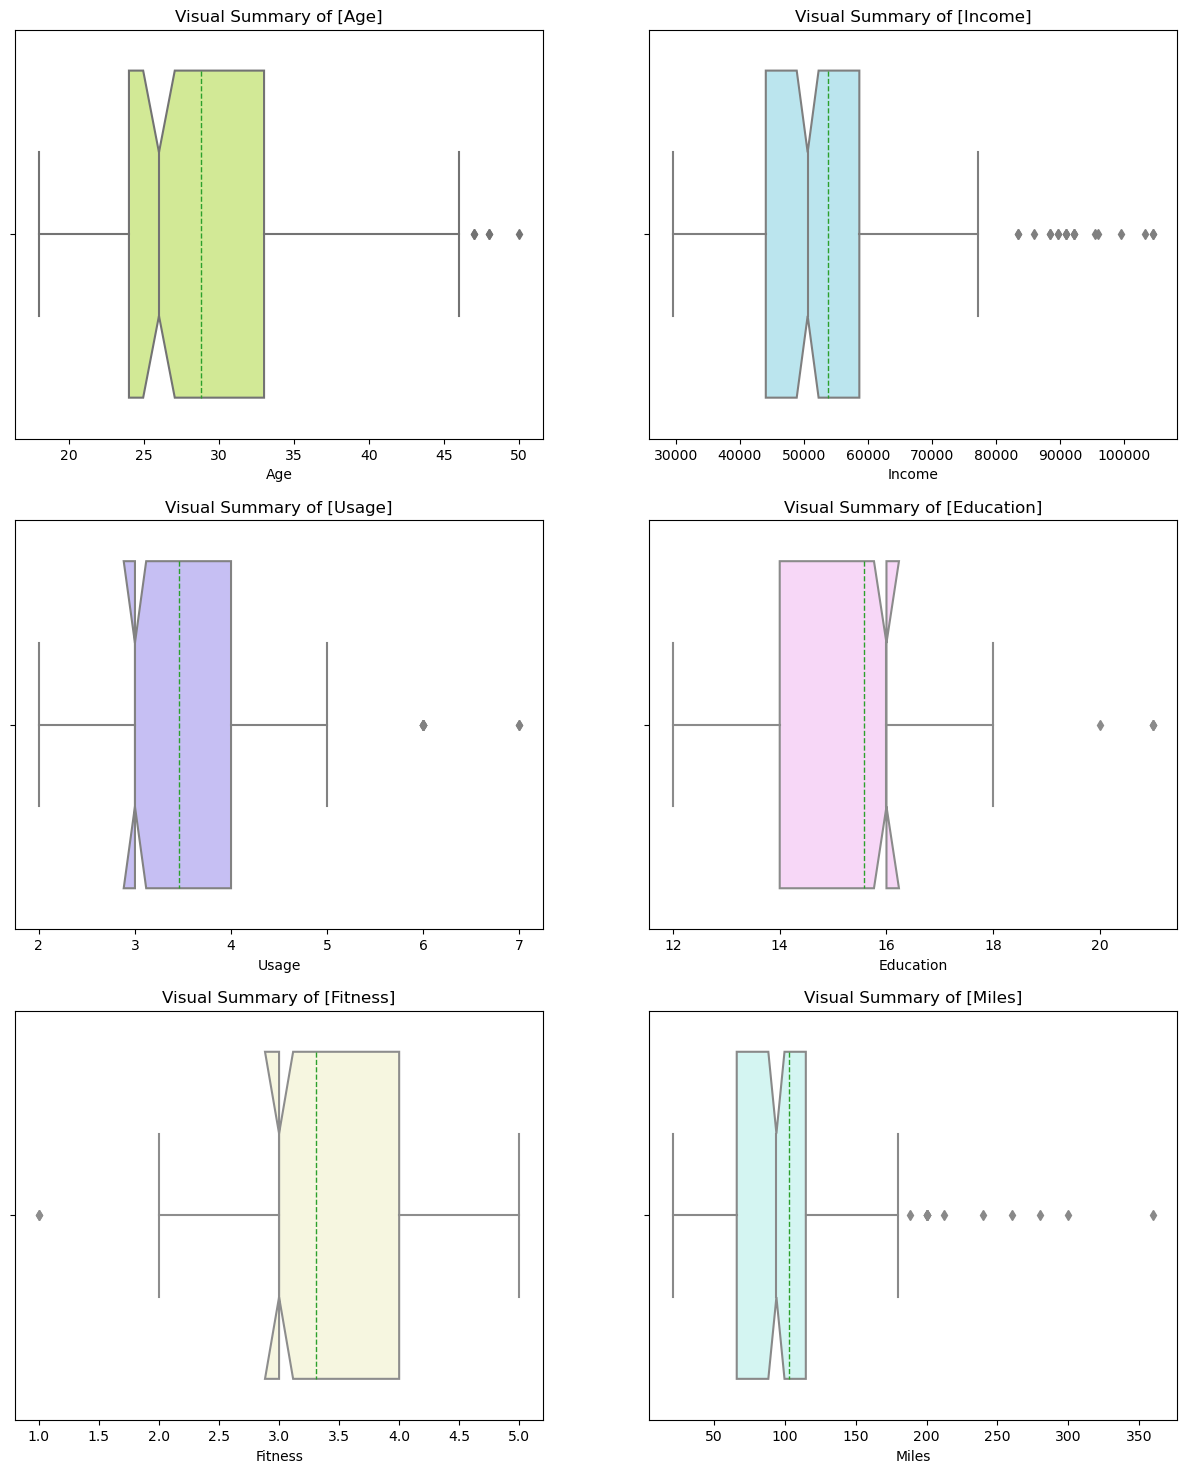

In [18]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.subplots_adjust(top=1.5)
b1 = sns.boxplot(data=df_cat, x="Age", orient='h', ax=axis[0,0],color="#d8f788",meanline=True,showmeans=True,notch=True)
b1.set_title("Visual Summary of [Age]")
b2 = sns.boxplot(data=df, x="Income", orient='h', ax=axis[0,1],color="#b2ebf7",meanline=True,showmeans=True,notch=True)
b2.set_title("Visual Summary of [Income]")
b3 = sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0],color="#bfb6fc",meanline=True,showmeans=True,notch=True)
b3.set_title("Visual Summary of [Usage]")
b4 = sns.boxplot(data=df, x="Education", orient='h', ax=axis[1,1],color="#fcd2fc",meanline=True,showmeans=True,notch=True)
b4.set_title("Visual Summary of [Education]")
b5 = sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[2,0],color="#f9fadc",meanline=True,showmeans=True,notch=True)
b5.set_title("Visual Summary of [Fitness]")
b6 = sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1],color="#cffaf6",meanline=True,showmeans=True,notch=True)
b6.set_title("Visual Summary of [Miles]")
plt.show()

#### Above plots indicate that, Age, Education & Usage are having very few outliers.
#### Income and Miles are having more outliers.

### Distribution of count for Various Numerical attributes using Histogram with KDE

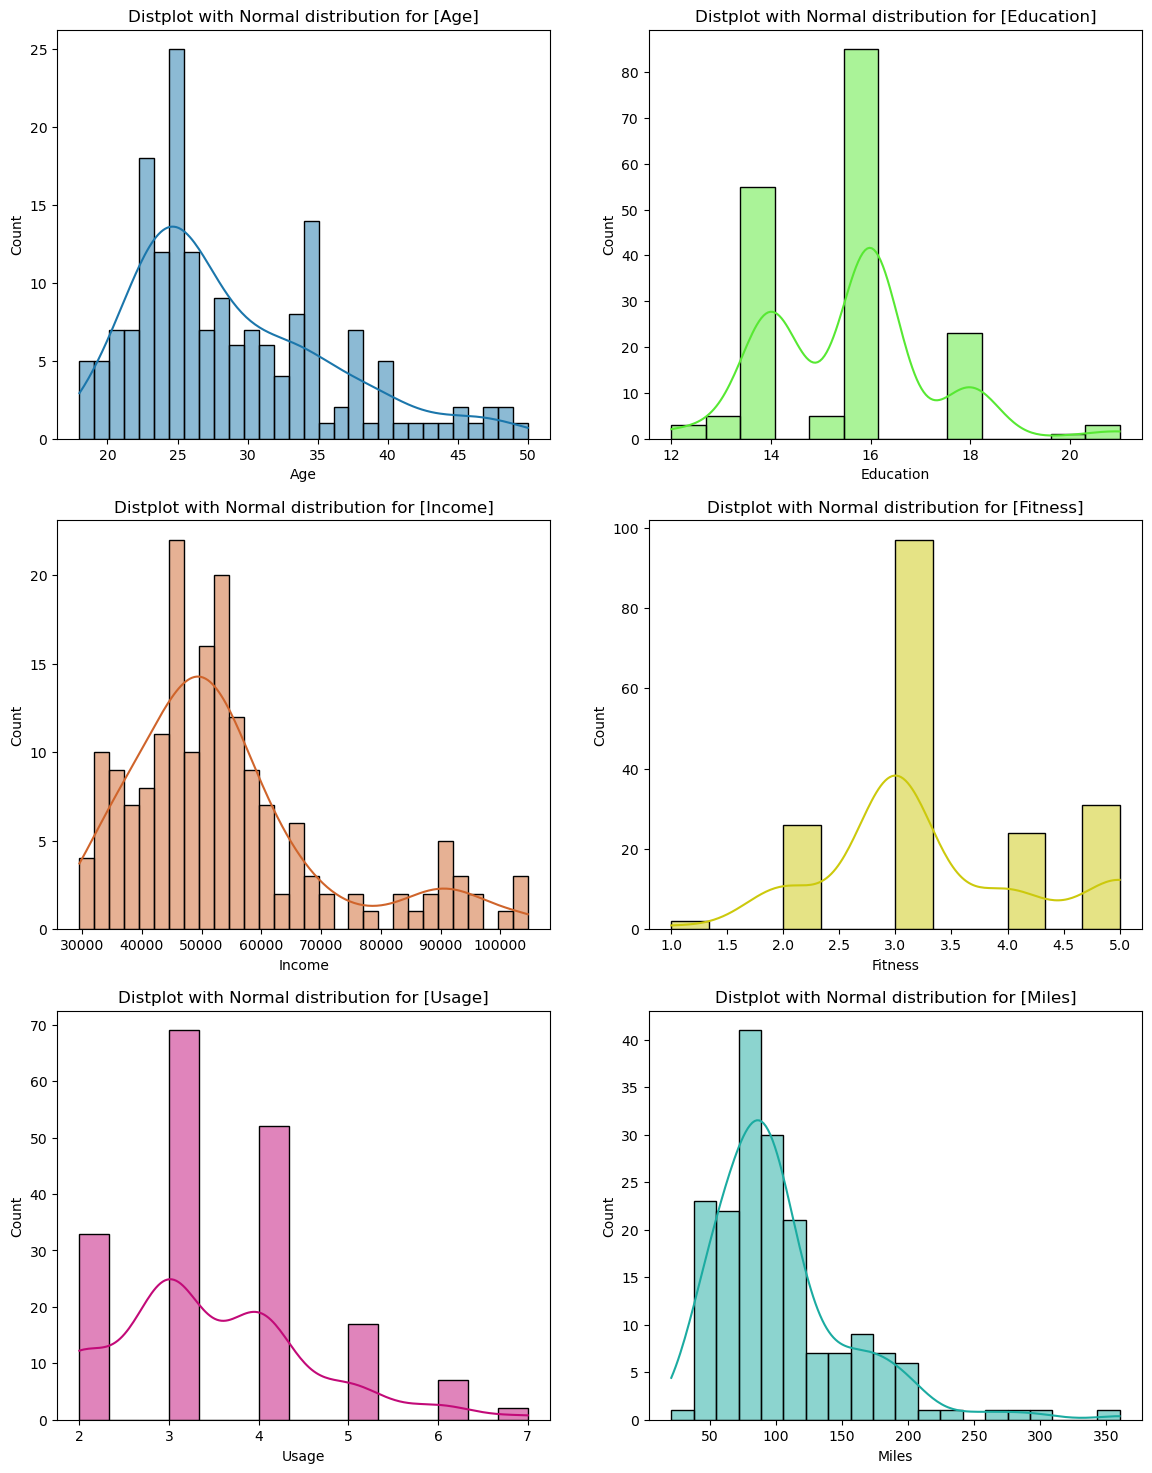

In [19]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
fig.subplots_adjust(top=1.5)
g1 = sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0],color="#1b76ab",bins=30)
g1.set_title("Distplot with Normal distribution for [Age]")
g2 = sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1],color="#57e833")
g2.set_title("Distplot with Normal distribution for [Education]")
g3 = sns.histplot(data=df, x="Income", kde=True, ax=axis[1,0],color="#cf642b",bins=30)
g3.set_title("Distplot with Normal distribution for [Income]")
g4 = sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1],color="#ccc90c")
g4.set_title("Distplot with Normal distribution for [Fitness]")
g5 = sns.histplot(data=df, x="Usage", kde=True, ax=axis[2,0],color="#c20a78")
g5.set_title("Distplot with Normal distribution for [Usage]",)
g6 = sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1],color="#1baba1",bins=20)
g6.set_title("Distplot with Normal distribution for [Miles]")
plt.show()

#### >> The above plots indicate that 50% of the individuals are aged between to to 35.
#### >> Majority of the people have a Education level of more than 14 years.
#### >> Majority of the people have a Annual income between 30k to 65k.
#### >> Majority of the people rated the fitness level as 3 and above.
#### >> 50% of the people are using the product more than 3 times per week.
#### >> 50% of the people have covered running miles between 50 to 150.

## Bivariate & Multivariate Analysis

### Analysis based on Age vs Income differentiated by [Product, Gender, MaritalStatus, Education] using Scatterplot

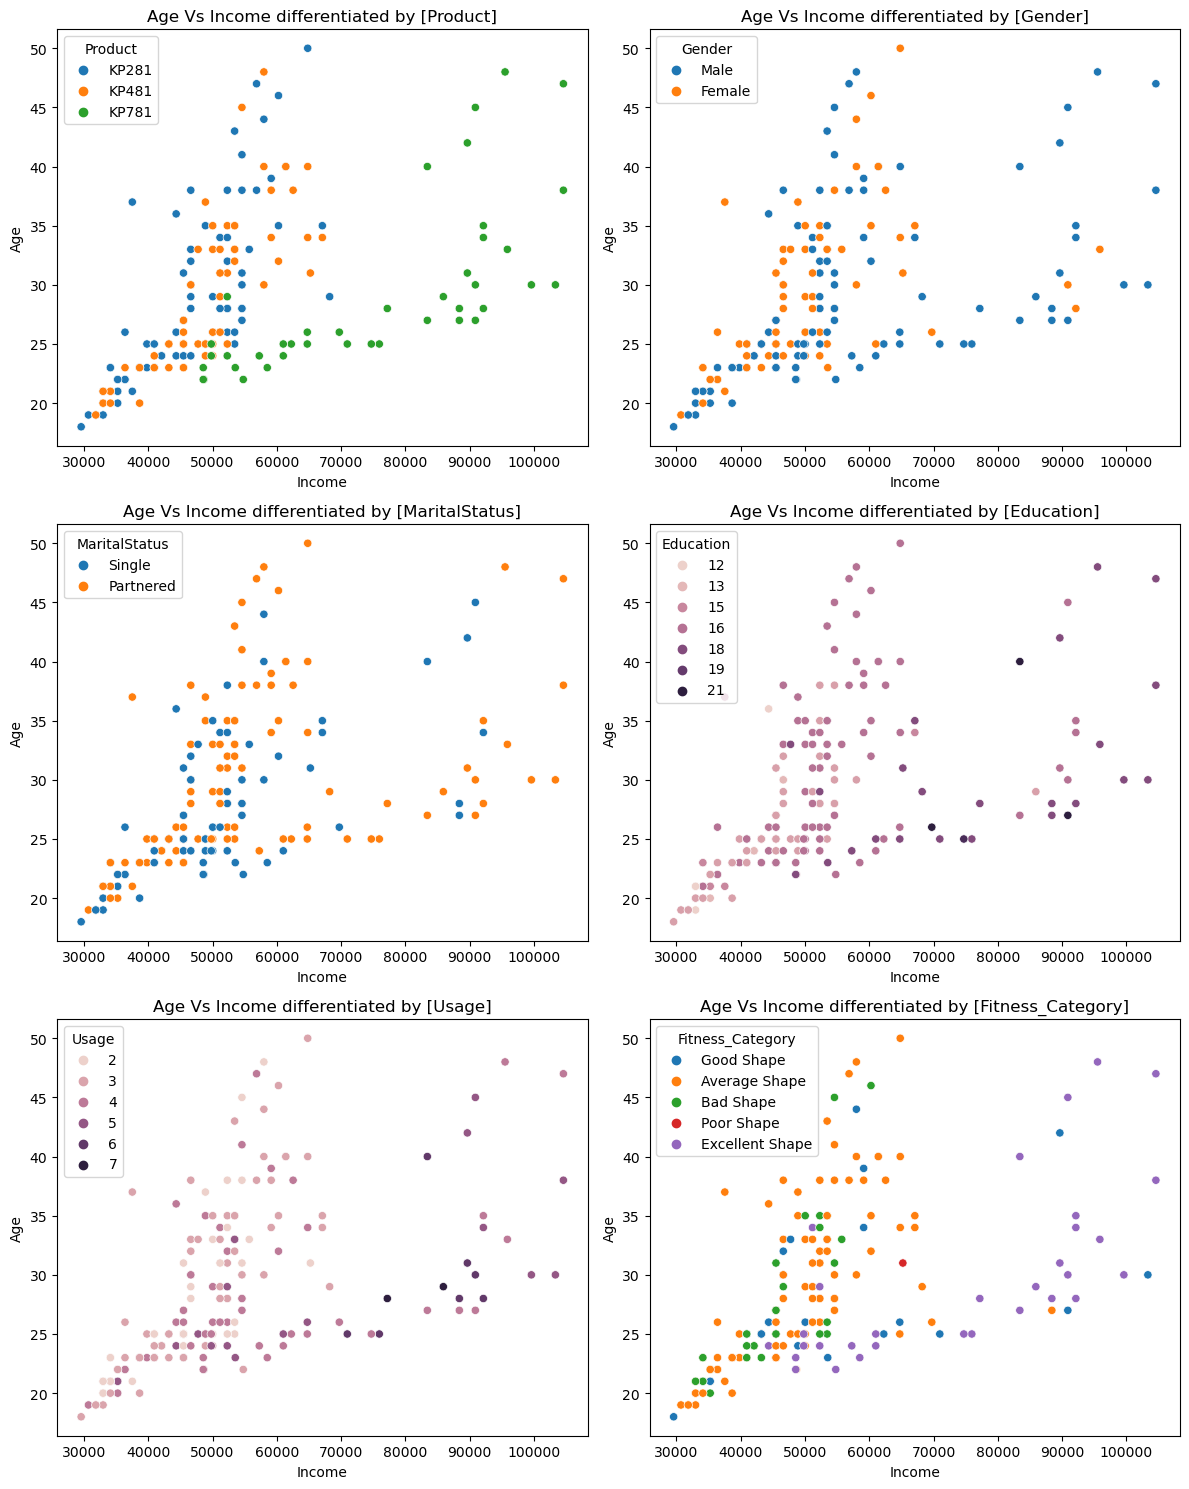

In [20]:
col_list = ['Product','Gender','MaritalStatus','Education','Usage','Fitness_Category']
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(12, 15))
axes = axes.flatten()
i = 0
for col in col_list:
    sns.scatterplot(data=df,x='Income',y='Age',hue=col,ax=axes[i])
    axes[i].set_title(f"Age Vs Income differentiated by [{col}]")
    i += 1
fig.tight_layout()
plt.show()

#### >> Income is increasing as the age increasing. But there are some exceptional people who got higher salary in there early age.
#### >> Product KP781 is the costliest treadmill, people with highest income able to purchase.
#### >> Males tends to get more higher salary than Females.

### Analysis based on Product Type vs [Age, Education, Income, Miles] using BoxPlot

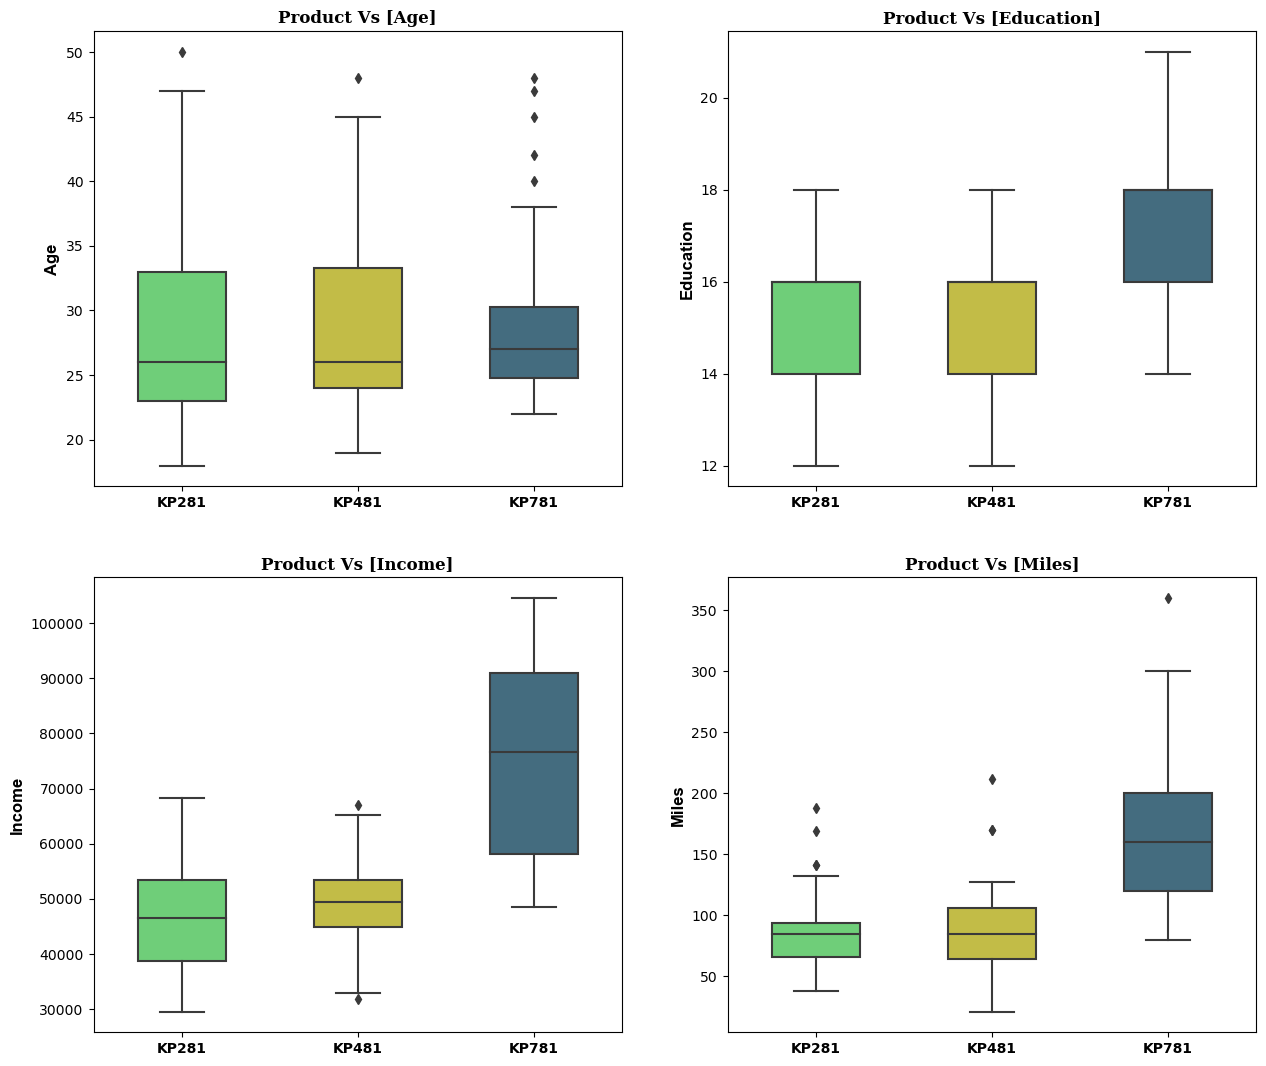

In [21]:
fig = plt.figure(figsize = (15,13))
gs = fig.add_gridspec(2,2)

for i,j,k in [(0,0,'Age'),(0,1,'Education'),(1,0,'Income'),(1,1,'Miles')]:
    ax0 = fig.add_subplot(gs[i,j])
    sns.boxplot(data = df, x = 'Product', y  = k ,ax = ax0,width = 0.5, palette =["#5fde6c", "#d6ce33","#3A7089"])
    ax0.set_title(f'Product Vs [{k}]',{'font':'serif', 'size':12,'weight':'bold'})
    ax0.set_xticklabels(df['Product'].unique(),fontweight = 'bold')
    ax0.set_ylabel(f'{k}',font='Arial',fontweight = 'bold',fontsize = 12)
    ax0.set_xlabel('')
    
plt.show()

#### >> The analysis presented above clearly indicates a strong preference for the treadmill model [KP781] among customers who possess **higher education, higher income levels, and intend to engage in running activities exceeding 150 miles per week.**

### Analysis based on Gender vs [Age, Education, Income, Miles] using BoxPlot

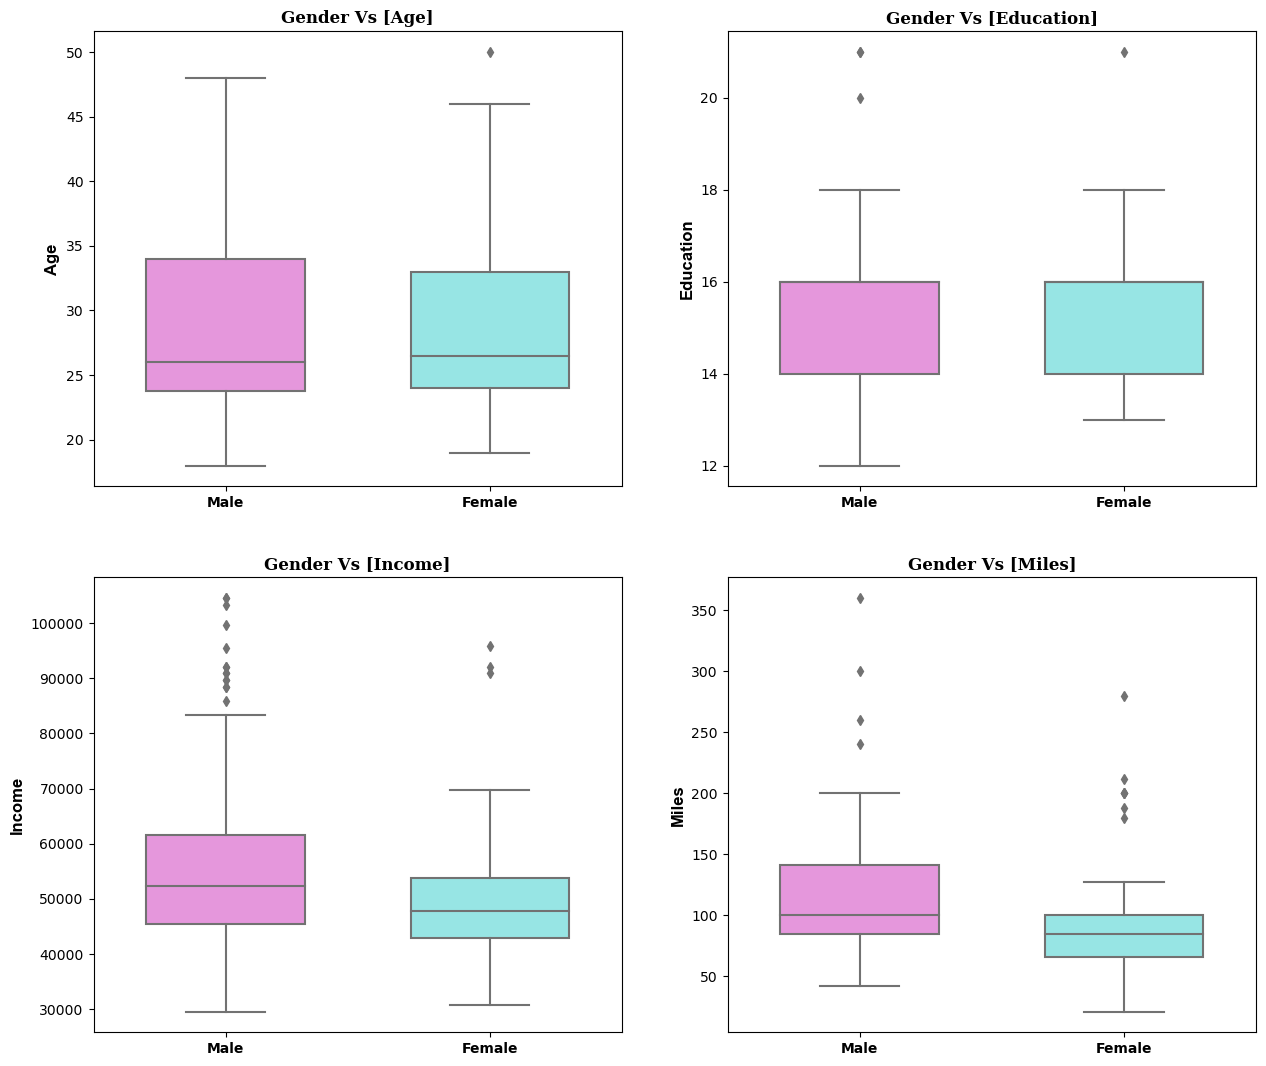

In [22]:
fig = plt.figure(figsize = (15,13))
gs = fig.add_gridspec(2,2)

for i,j,k in [(0,0,'Age'),(0,1,'Education'),(1,0,'Income'),(1,1,'Miles')]:
    ax0 = fig.add_subplot(gs[i,j])
    sns.boxplot(data = df, x = 'Gender', y  = k ,ax = ax0,width = 0.6, palette =["#f28ae6", "#8af2f1","#3A7089"])
    ax0.set_title(f'Gender Vs [{k}]',{'font':'serif', 'size':12,'weight':'bold'})
    ax0.set_xticklabels(df['Gender'].unique(),fontweight = 'bold')
    ax0.set_ylabel(f'{k}',font='Arial',fontweight = 'bold',fontsize = 12)
    ax0.set_xlabel('')
    
plt.show()

#### >> The above graph indicates that median age of Male and female are almost equal
####  >> Education level between 25th Quartile an 75 Quartlie are equally good
#### >> Income Level of Male are compartively higher than female
#### >> Miles covered by Male are much better and median miles also much higher compared to Females

### Analysis based on Gender Vs [Product Usage / Fitness Category]

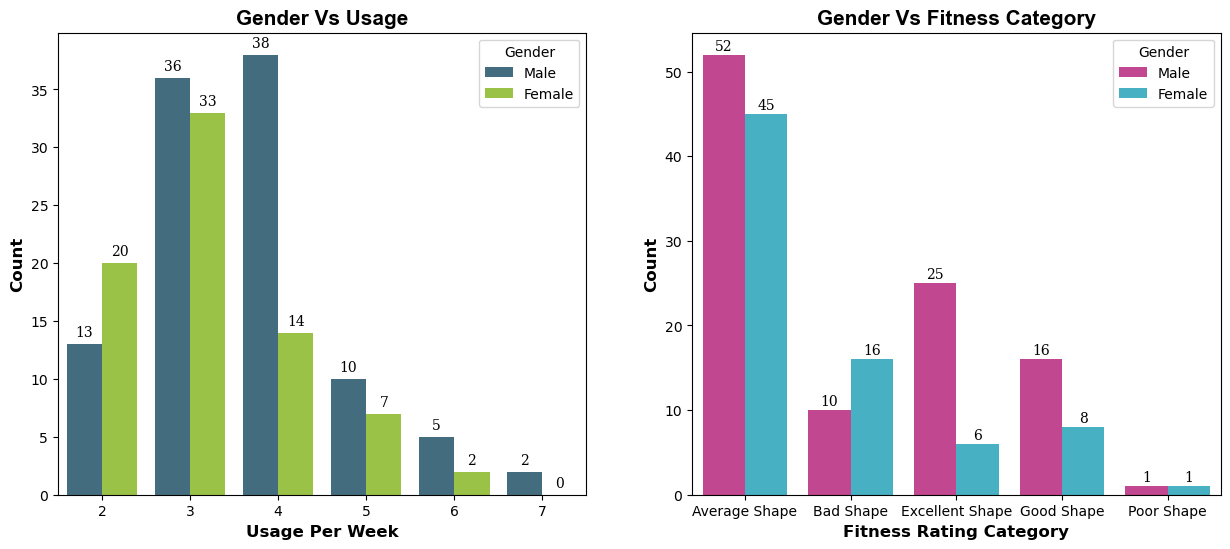

In [51]:
#Setting Plot style
fig = plt.figure(figsize = (15,6))
gs = fig.add_gridspec(1,2)
#### Gender Vs Usage
#creating bar plot
ax1 = fig.add_subplot(gs[0,0])
plot = sns.countplot(data = df, x = 'Usage', hue = 'Gender',order = sorted(df['Usage'].unique()), 
              ax = ax1,palette = ["#3A7089","#a0d633"],zorder = 2)
#adding the value_counts for Data labels
for i in plot.patches:
    ax1.text(i.get_x()+0.2,i.get_height()+1,f'{i.get_height():.0f}',{'font':'serif','size' : 10},ha = 'center',va = 'center')
#adding axis label
ax1.set_xlabel('Usage Per Week',fontweight = 'bold',fontsize = 12)
ax1.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
#setting title for visual
ax1.set_title('Gender Vs Usage',{'font':'Arial', 'size':15,'weight':'bold'})
#### Gender Vs Fitness Category
## Creating Bar plot
ax2 = fig.add_subplot(gs[0,1])
plot = sns.countplot(data = df_cat, x = 'Fitness_Category', hue = 'Gender',order = sorted(df_cat['Fitness_Category'].unique()), 
              ax = ax2,palette = ["#d63395","#33bed6"],zorder = 2)
#adding the value_counts for Data labels
for i in plot.patches:
    ax2.text(i.get_x()+0.2,i.get_height()+1,f'{i.get_height():.0f}',{'font':'serif','size' : 10},ha = 'center',va = 'center')
# Customizing axis labels
ax2.set_xlabel('Fitness Rating Category',fontweight = 'bold',fontsize = 12)
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
# Setting title for visual
ax2.set_title('Gender Vs Fitness Category',{'font':'Arial', 'size':15,'weight':'bold'})    
plt.show()

#### Gender Vs Usage
##### >> 71.2%(74) of Male customers plan to use the treadmill for 3 to 4 times a week whereas 61.8%(47) of Female customers plan to use the treadmill for 3 to 4 times.

#### Gender Vs Fitness
##### >> 89.4%(93) of Male customers rated themselves between 3 to 5 (Average to Excellent), whereas almost  77.6%(59) of Female customer rated themselves between 3 to 5 (Average to Excellent) on the fitness scale.

In [24]:
df_cat.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Fitness_Category', 'Age_Group',
       'Income_Group', 'Miles_Group'],
      dtype='object')

### Comparison of [Miles] Vs [Fitness Category] using Marginal Distribution Plot

In [25]:
fig = px.scatter(df_cat, x='Fitness_Category',y='Miles', color="Miles", size='Miles', hover_data=['Fitness_Category'], 
                 title="[Miles] Vs [Fitness Category] using Marginal Distribution Plot",
                 marginal_x="histogram", marginal_y="rug")
fig.show()

#### >> The above graph indicates that Majority of the people is in Averarage shape who are running beyond 100 Miles.
#### >> People who runs beyond 150 miles able to attaing the fitness rating of 5 to get Excellent Shape.

In [26]:
# 1. If the customer walking more no. of miles distance weekly the chances of fitness of being Fit is high

In [27]:
df_cat.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Fitness_Category', 'Age_Group',
       'Income_Group', 'Miles_Group'],
      dtype='object')

## Multidimentional Analysis using Facetting Scatter plots

### Analysis based on [Gender Vs Fitness Vs Income Vs Product]

In [28]:
fig = px.scatter(df_cat, x="Income", y="Fitness", color="Product",facet_col="Product",facet_row="Gender",
                 title="Gender Vs Fitness Vs Income Vs Product")
fig.show()

#### The above facetting plot shows that most of the people (Male & Female) with income beyond 60k  could afford to have KP781 product to be able to attain the fitness Rating of 5.

### Analysis based on [Gender Vs Fitness Vs Usage Vs Product]

In [29]:
fig = px.scatter(df_cat, x="Usage", y="Fitness", color="Product",facet_col="Product", facet_row="Gender",
                 title="Gender Vs Fitness Vs Usage Vs Product",)
fig.show()

#### The above plot indicates that people (Male & Female) who use beyond 3 times a week able to achieve fitness rating of 3 and above and many people able to achieve fitness rating 5 using the product KP781 when compared to KP281.

### Analysis based on [Gender Vs Fitness Vs Education Vs Product]

In [30]:
fig = px.scatter(df_cat, x="Education", y="Fitness", color="Product",facet_col="Product", facet_row="Gender",
                 title="Gender Vs Fitness Vs Education Vs Product")
fig.show()

#### The above plot indicates that people who have more than 15 years of education are more fitness concious and they are able to achieve the fitness rating of 3 and above.

### Analysis based on [Gender Vs Income Vs Miles Vs Product]

In [31]:
fig = px.scatter(df_cat, x="Miles", y="Income", color="Product",facet_col="Product", facet_row="Gender",
                 title="Gender Vs Income Vs Miles Vs Product")
fig.show()

#### The above plots indicates that more than 200 miles are achived by using KP781 by Male & Female who possess higher income beyond 70k.

### Analysis based on [Gender Vs Fitness Vs Miles Vs MaritalStatus]

In [32]:
fig = px.scatter(df_cat, x="Miles", y="Fitness", color="MaritalStatus",facet_col="MaritalStatus", facet_row="Gender",
                 title="Gender Vs Fitness Vs Miles Vs MaritalStatus")
fig.show()

#### >> The above plots indicates that Married/Partnered Male and Female are able to cover beyond 200 miles and attaining better fitness rating when compared with Single individual.

### Analysis based on [Gender Vs Usage Vs Fitness Vs Marital Status Vs Product]

In [33]:
fig = px.scatter(df_cat, x="Fitness", y="Usage", color="Product",facet_col="MaritalStatus", facet_row="Gender",
                 title="Gender Vs Usage Vs Fitness Vs Marital Status Vs Product")
fig.show()

#### >> The above plots indicates that Single and Partnered individuals use KP781 product to attain the better fitness rating.

### Analysis based on [Gender Vs Fitness Vs Education Vs Marital Status Vs Product]

In [34]:
fig = px.scatter(df_cat, x="Education", y="Fitness", color="Product",facet_col="MaritalStatus", facet_row="Gender",
                 title="Gender Vs Fitness Vs Education Vs Marital Status Vs Product")
fig.show()

#### The above analysis indicates that people (Both Male & Female and Single & Partnered) who have education level of 14 years and above are more active in fitness routine and able to achieve rating of 3 and above.

### Analysis based on [Gender Vs Fitness Vs Income Vs Maritial Status Vs Product]

In [35]:
fig = px.scatter(df_cat, x="Income", y="Fitness", color="Product",facet_col="MaritalStatus", facet_row="Gender",
                 title="Gender Vs Fitness Vs Income Vs Maritial Status Vs Product]")
fig.show()

#### >> Single & Partnered individuals specifically Male with the income range beyond 60k mostly use KP781 followed by KP481, single & partnered female less likely to prefer KP781.

### Analysis based on [Age vs Miles vs Fitness Category]

In [36]:
fig = px.scatter(df_cat,x='Age',y='Miles', color="Fitness_Category", 
                 hover_data=['Fitness_Category'],title="Age vs Miles vs Fitness Category")
fig.show()

#### The above plot clearly indicates that people who are ageed between 20 to 35 are more active in fitness routine and able to cover more than 100 miles per week to obtain fitness level of Average, Good & Excellent.

In [37]:
# Function _get_numeric_data() to filter only numeric columns
# to perform Correlation Analysis
df3 = df_cat._get_numeric_data()
df3.head()

Age  Education  Usage  Fitness  Income  Miles
0   18         14      3        4   29562    112
1   19         15      2        3   31836     75
2   19         14      4        3   30699     66
3   19         12      3        3   32973     85
4   20         13      4        2   35247     47

### Correlation Analysis using HeatMap for all the Numerical Columns

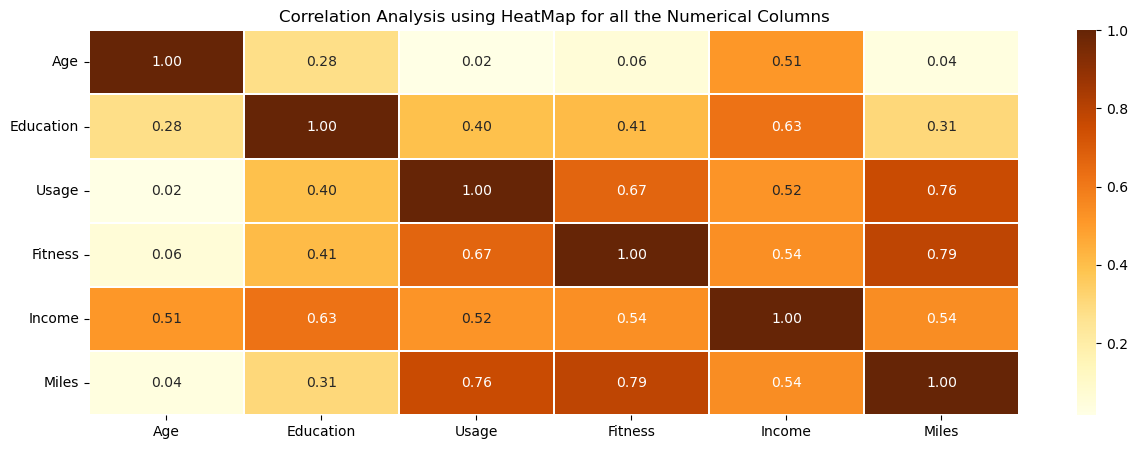

In [38]:
plt.figure(figsize=(15,5))
ax = sns.heatmap(df3.corr(),annot=True,fmt='.2f',linewidths=0.1,cmap="YlOrBr")
plt.title("Correlation Analysis using HeatMap for all the Numerical Columns")
plt.yticks(rotation=0)
plt.show()

#### >> Correlation between Age and Miles is 0.03
#### >> Correlation between Education and Income is 0.62
#### >> Correlation between Usage and Fitness is 0.66
#### >> Correlation between Fitness and Age is 0.06
#### >> Correlation between Income and Usage is 0.51
#### >> Correlation between Miles and Age is 0.03

## Computation of [Marginal & Conditional] Probabilities

### Marginal Probability of All the Categorical Columns shown here

In [39]:
lsts = ['Product','Gender', 'Education', 'MaritalStatus', 'Usage','Fitness_Category', 'Age_Group']
print("*"*60)
for i in lsts:
    ls = set(df_cat[i].values)
    print(f"Marginal Probability of [{i}] are given below:")
    for j in ls:
        print(j,"-->",round(len(df_cat[df_cat[i]==j])/len(df[i])*100,2),"%")
    print("*"*60)

************************************************************
Marginal Probability of [Product] are given below:
KP781 --> 22.22 %
KP481 --> 33.33 %
KP281 --> 44.44 %
************************************************************
Marginal Probability of [Gender] are given below:
Female --> 42.22 %
Male --> 57.78 %
************************************************************
Marginal Probability of [Education] are given below:
12 --> 1.67 %
13 --> 2.78 %
14 --> 30.56 %
15 --> 2.78 %
16 --> 47.22 %
18 --> 12.78 %
20 --> 0.56 %
21 --> 1.67 %
************************************************************
Marginal Probability of [MaritalStatus] are given below:
Single --> 40.56 %
Partnered --> 59.44 %
************************************************************
Marginal Probability of [Usage] are given below:
2 --> 18.33 %
3 --> 38.33 %
4 --> 28.89 %
5 --> 9.44 %
6 --> 3.89 %
7 --> 1.11 %
************************************************************
Marginal Probability of [Fitness_Category] are 

### Conditional Probability of [Product] purchase w.r.t. [Gender]

In [54]:
pd.crosstab(index =df_cat['Product'],columns = df_cat['Gender'],margins = True,normalize = True ).round(2)*100

Gender   Female  Male    All
Product                     
KP281      22.0  22.0   44.0
KP481      16.0  17.0   33.0
KP781       4.0  18.0   22.0
All        42.0  58.0  100.0

**The Conditional Probability of purchasing the Treadmill model given that the customer is [Male] are :**
- For Treadmill model KP281,  KP481 &  KP781 are **22%**, **17%** & **18%** respectively.

**The Conditional probability of purchasing the Treadmill model given that the customer is [Female] are :**
- For Treadmill model KP281,  KP481 &  KP781 are **22%**, **16%** & **4%** respectively.

### Conditional Probability of [Product] purchase w.r.t. [Marital Status]

In [41]:
pd.crosstab(index =df_cat['Product'],columns = df_cat['MaritalStatus'],margins = True,normalize = True ).round(2)*100

MaritalStatus  Partnered  Single    All
Product                                
KP281               27.0    18.0   44.0
KP481               20.0    13.0   33.0
KP781               13.0     9.0   22.0
All                 59.0    41.0  100.0

**The Conditional Probability of purchasing the Treadmill model given that the customer is [Partnered] are :**
- For Treadmill model KP281,  KP481 &  KP781 are **27%**, **20%** & **13%** respectively.

**The conditional Probability of purchasing the Treadmill model given that the customer is [Single] are :**
- For Treadmill model KP281,  KP481 &  KP781 are **18%**, **13%** & **9%** respectively.

### Conditional Probability of [Product] purchase w.r.t. [Age Group]

In [42]:
pd.crosstab(index =df_cat['Product'],columns = df_cat['Age_Group'],margins = True,normalize = True ).round(2)*100

Age_Group  Teen  Adult  Middle Aged  Elder    All
Product                                          
KP281       6.0   31.0          6.0    2.0   44.0
KP481       4.0   25.0          4.0    1.0   33.0
KP781       0.0   19.0          2.0    1.0   22.0
All         9.0   75.0         12.0    3.0  100.0

**The Conditional Probability of purchasing the Treadmill model given that the customer is [Teen (0-21)] are :** 
- For Treadmill model KP281,  KP481 &  KP781 are **6%**, **4%** & **0%** respectively.
        
**The Conditional Probability of purchasing the Treadmill model given that the customer is [Adult (22-35)] are :** 
- For Treadmill model KP281,  KP481 &  KP781 are **31%**, **25%** & **19%** respectively.
        
**The Conditional Probability of purchasing the Treadmill model given that the customer is [Middle Aged (36-45)] are :**
- For Treadmill model KP281,  KP481 &  KP781 are **6%**, **4%** & **2%** respectively.

**The Conditional Probability of purchasing the Treadmill model given that the customer is [Elder (>45)] are :**
- For Treadmill model KP281,  KP481 &  KP781 are **2%**, **1%** & **1%** respectively.

### Conditional Probability of [Product] purchase w.r.t. [Fitness_Category]

In [43]:
pd.crosstab(index =df_cat['Product'],columns = df_cat['Fitness_Category'],margins = True,normalize = True ).round(2)*100

Fitness_Category  Average Shape  Bad Shape  Excellent Shape  Good Shape  \
Product                                                                   
KP281                      30.0        8.0              1.0         5.0   
KP481                      22.0        7.0              0.0         4.0   
KP781                       2.0        0.0             16.0         4.0   
All                        54.0       14.0             17.0        13.0   

Fitness_Category  Poor Shape    All  
Product                              
KP281                    1.0   44.0  
KP481                    1.0   33.0  
KP781                    0.0   22.0  
All                      1.0  100.0

**The Conditional Probability of purchasing the treadmill model given that the customer has [Average] fitness level are :**
- For Treadmill model KP281,  KP481 &  KP781 are **30%**, **22%** & **2%** respectively.

**The Conditional Probability of purchasing the treadmill model given that the customer has [Good] fitness level are :**
- For Treadmill model KP281,  KP481 &  KP781 are **5%**, **4%** & **4%** respectively.

**The Conditional Probability of purchasing the treadmill model given that the customer has [Bad] fitness level are :**
- For Treadmill model KP281,  KP481 &  KP781 are **8%**, **7%** & **0%** respectively.

**The Conditional Probability of purchasing the treadmill model given that the customer has [Poor] fitness level are :**
- For Treadmill model KP281,  KP481 &  KP781 are **1%**, **1%** & **0%** respectively.

### Conditional Probability of [Product] purchase w.r.t. [Usage]

In [44]:
pd.crosstab(index =df_cat['Product'],columns = df_cat['Usage'],margins = True,normalize = True ).round(2)*100

Usage       2     3     4    5    6    7    All
Product                                        
KP281    11.0  21.0  12.0  1.0  0.0  0.0   44.0
KP481     8.0  17.0   7.0  2.0  0.0  0.0   33.0
KP781     0.0   1.0  10.0  7.0  4.0  1.0   22.0
All      18.0  38.0  29.0  9.0  4.0  1.0  100.0

**The Conditional Probability of purchasing the treadmill model given that the customer has Avg Usage level of [3 times] per week are :**
- For Treadmill model KP281,  KP481 &  KP781 are **21%**, **17%** & **1%** respectively.

**The Conditional Probability of purchasing the treadmill model given that the customer has Avg Usage level of [4 times] per week are :**
- For Treadmill model KP281,  KP481 &  KP781 are **12%**, **7%** & **10%** respectively.

**The Conditional Probability of purchasing the treadmill model given that the customer has Avg Usage level of [2 times] per week are :**
- For Treadmill model KP281,  KP481 &  KP781 are **11%**, **8%** & **0%** respectively.

### Conditional Probability of [Product] purchase w.r.t. [Miles Group]

In [45]:
pd.crosstab(index =df_cat['Product'],columns = df_cat['Miles_Group'],margins = True,normalize = True ).round(2)*100

Miles_Group  Light Activity  Moderate Activity  Active Lifestyle  \
Product                                                            
KP281                   7.0               28.0              10.0   
KP481                   3.0               22.0               8.0   
KP781                   0.0                4.0              15.0   
All                     9.0               54.0              33.0   

Miles_Group  Fitness Enthusiast    All  
Product                                 
KP281                       0.0   44.0  
KP481                       1.0   33.0  
KP781                       3.0   22.0  
All                         3.0  100.0

1. The **Probability** of a treadmill being purchased by a customer with lifestyle of **Light Activity(0 to 50 miles/week) is 9%**.
    - **The conditional probability** of purchasing the treadmill model given that the customer has **Light Activity Lifestyle** are  -
        - For Treadmill model KP281,  KP481 &  KP781 are **7%**, **3%** & **0%** respectively.
2. The **Probability** of a treadmill being purchased by a customer with lifestyle of **Moderate Activity(51 to 100 miles/week) is 54%**.
    - **The conditional probability** of purchasing the treadmill model given that the customer with lifestyle of **Moderate Activity** are  -
        - For Treadmill model KP281,  KP481 &  KP781 are **28%**, **22%** & **4%** respectively.
2. The **Probability** of a treadmill being purchased by a customer has **Active Lifestyle(100 to 200 miles/week) is 33%**.
    - **The conditional probability** of purchasing the treadmill model given that the customer has **Active Lifestyle** are  -
        - For Treadmill model KP281,  KP481 &  KP781 are **10%**, **8%** & **15%** respectively.        
4. The **Probability** of a treadmill being purchased by a customer who is **Fitness Enthusiast(>200 miles/week) is 3% only**   

### Conditional Probability of [Product] purchase w.r.t. [Income Group]

In [46]:
pd.crosstab(index =df_cat['Product'],columns = df_cat['Income_Group'],margins = True,normalize = True ).round(2)*100

Income_Group  Low Income  Moderate Income  High Income  Very High Income  \
Product                                                                    
KP281               13.0             28.0          3.0               0.0   
KP481                5.0             24.0          4.0               0.0   
KP781                0.0              6.0          6.0              11.0   
All                 18.0             59.0         13.0              11.0   

Income_Group    All  
Product              
KP281          44.0  
KP481          33.0  
KP781          22.0  
All           100.0

1. The **Probability** of a treadmill being purchased by a customer with **Low Income(<40k) is 18%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer has **Low Income** are  -
        - For Treadmill model KP281,  KP481 &  KP781 are **13%**, **5%** & **0%** respectively.
        
2. The **Probability** of a treadmill being purchased by a customer with **Moderate Income(40k - 60k) is 59%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer has **Moderate Income** are  -
       - For Treadmill model KP281,  KP481 &  KP781 are **28%**, **24%** & **6%** respectively.
       
3. The **Probability** of a treadmill being purchased by a customer with **High Income(60k - 80k) is 13%**

    - **The conditional probability** of purchasing the treadmill model given that the customer has **High Income** are  -
       - For Treadmill model KP281,  KP481 &  KP781 are **3%**, **4%** & **6%** respectively.
        
4. The **Probability** of a treadmill being purchased by a customer with **Very High Income(>80k) is 11%**

    - **The conditional probability** of purchasing the treadmill model given that the customer has **High Income** are  -
        - For Treadmill model KP281,  KP481 &  KP781 are **0%**, **0%** & **11%** respectively.

## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Based on the provided data, here are some additional insights and recommendations:

#### >> The KP781 model shows a noticeable difference in sales between genders, with only 18% of total sales coming from female customers. To improve this, it’s suggested to use targeted strategies like marketing campaign, special promotions and trials specifically for female customers should be initiated.

#### >> The KP781 product could be recommended for customers in the age group above 40 years. Similarly, the KP781 model could be marketed towards single people with high income and people aged between 22-35.

#### >> KP281 & KP481 treadmills are favored by customers with an annual income between 39K - 53K Dollars. These models should be marketed as budget-friendly treadmills.

#### >> The KP781 model, which provides more features and functionalities, could be marketed towards professionals and athletes. This could be done through partnerships with influencers and international athletes who can endorse the product.

#### >> There seems to be potential for expanding the market to customers above 50 years of age. However, this would require careful consideration of the health pros and cons associated with using the product at this age. Research could be conducted to understand this demographic better and tailor the product offerings accordingly.

#### >> Offer customer support and suggest users upgrade from lower versions to next-level versions after consistent usage.

#### >> Considering the target customer’s age, education level, and income, it’s crucial to price the KP281 and KP481 Treadmill affordably. Also, offering flexible payment plans that let customers spread the cost over several months can make the treadmill more budget-friendly.

#### >> Research is needed to expand the market to those above 50 years of age, considering the health benefits and risks.

#### Note: Remember, these are just insights based on the provided data. The actual implementation of these recommendations should be done in accordance with the company’s overall strategy and goals. It’s also important to continuously monitor and adjust these strategies based on their effectiveness and changing market conditions.

## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~